In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
from matplotlib import collections  as mc

In [ ]:
#getting started https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

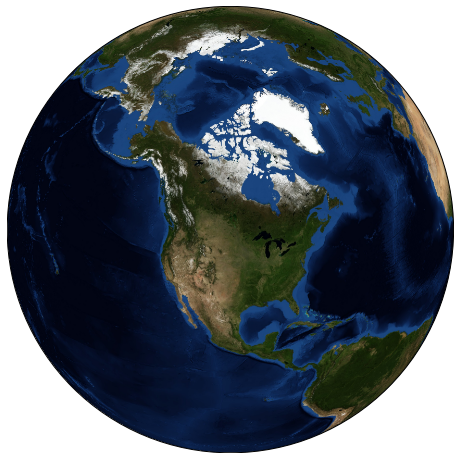

In [4]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [5]:
#read in points from file
import os
df1 = pd.read_csv('../data/raw/IBS2_First_2_Years/Tow_Info.csv')
df2 = pd.read_csv('../data/raw/IBS2_First_2_Years/tow_info_201880.csv')
tow_df = df1.append( df2, ignore_index=True ).dropna()

tow_df['slon'] =  tow_df.apply(lambda row: float((row["START_LON"]).replace('W','')) / -100, axis=1) 
tow_df['slat'] =  tow_df.apply(lambda row: float((row["START_LAT"]).replace('N','')) / 100, axis=1) 
tow_df['elon'] =  tow_df.apply(lambda row: float((row["END_LON"]).replace('W','')) / -100, axis=1) 
tow_df['elat'] =  tow_df.apply(lambda row: float((row["END_LAT"]).replace('N','')) / 100, axis=1) 

lats = [ i for i in tow_df['slat'] ]
lons = [ i for i in tow_df['slon'] ]

llcrnrlon = min(lons)
llcrnrlat = min(lats)
urcrnrlon = max(lons)
urcrnrlat = max(lats)
box = [ llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat ]


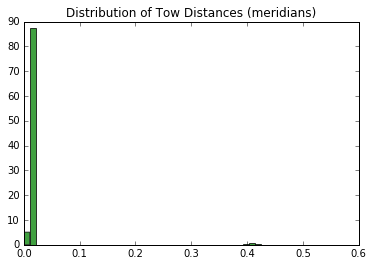

In [8]:
tow_df['dist'] = ((tow_df['slon'] - tow_df['elon'])**2 + (tow_df['slat'] - tow_df['elat'])**2) ** 0.5
(min(tow_df['dist']), max(tow_df['dist']), sum(tow_df['dist'])/len(tow_df['dist'])  )

plt.hist(tow_df['dist'], 50, normed=1, facecolor='green', alpha=0.75)
plt.title('Distribution of Tow Distances (meridians)')
plt.savefig( '../data/raw/Tow_Distance_hist.png' )
plt.show()

In [18]:
#drop erroneous long tows
print( tow_df.size )
tow_df = tow_df.loc[tow_df['dist'] < .1]
print( tow_df.size )

12735
12525


In [9]:
def get_arc( row ):
    return ( 
        row['slon'], row['slat'], row['elon'], row['elat'] )

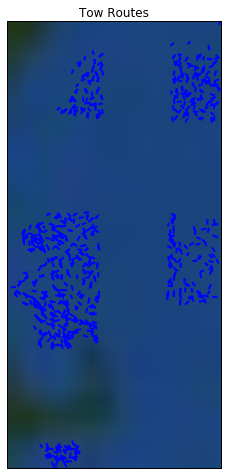

In [20]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='cass', resolution='i', llcrnrlon=box[0], llcrnrlat=box[1],
            urcrnrlon=box[2], urcrnrlat=box[3], 
            width=8E6, height=8E6, 
            lat_0=43.260511, lon_0=-68.299058,)  #43.260511, -68.299058
m.bluemarble()
#m.drawcoastlines()

# Map (long, lat) to (x, y) for plotting
#plt.plot()

for index, row in tow_df.iterrows():
    try:
        arc = get_arc(row)
        
        m.drawgreatcircle(arc[0],arc[1],arc[2],arc[3],linewidth=2,color='b')
    except:
        pass

#x, y = m(lons, lats)
#plt.plot(x, y, 'ok', markersize=5)
plt.title('Tow Routes')

plt.savefig( '../data/raw/Tow_Routes_zoomin.png' )
#plt.text(x, y, ' Seattle', fontsize=12);
plt.show()

In [37]:
# #read in points from file
# import os
# df = pd.read_csv('../data/raw/IBS2_First_2_Years/Tow_Info.csv')
# lats = [ float(i.replace('N',''))  /100.0 for i in df['START_LAT'] ]
# lons = [ float(i.replace('W','')) /-100.0 for i in df['START_LON'] ]

# geometry = [Point(xy) for xy in zip(df.x, df.y)]
# crs = {'init': 'epsg:2263'} #http://www.spatialreference.org/ref/epsg/2263/
# geo_df = GeoDataFrame(df, crs=crs, geometry=geometry)

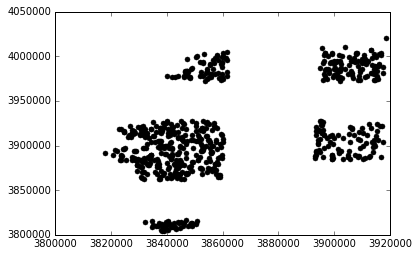

In [40]:
# lons = [-135.3318, -134.8331, -134.6572]
# lats = [57.0799, 57.0894, 56.2399]
x,y = m(lons, lats)

#m.plot(x, y, 'bo', markersize=18)
plt.plot(x, y, 'ok', markersize=5)
